In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

In [2]:
blue = '#4E79A7'
orange = '#F28E2B'
green = '#59A14F'

palette = [
    blue,
    orange,
    green
]

In [3]:
import os
import json
import yaml
import numpy as np
import pandas as pd
from pathlib import Path
import plotnine
from plotnine import *
import tb_gene_signature_pipeline.network_analysis as na
import tb_gene_signature_pipeline.plotting as tbplt
from mizani.formatters import comma_format

In [4]:
project_dir = Path.cwd().resolve().parent

In [5]:
with (project_dir / 'data' / 'datasets.json').open('r') as f:
    datasets = json.load(f)

In [22]:
diff_exprs = na.run_differential_expression_analysis()

In [23]:
df_exprs = diff_exprs['exprs']

In [24]:
df_results = diff_exprs['results']

In [46]:
tbplt.plot_expression_distributions(df_exprs, 'GSE19439').draw();

KeyboardInterrupt: 

In [27]:
merged_results = na.merge_differential_expression_results(
    df_results, adj_pval_thresh=0.05, log_fc_thresh=np.log2(1.5))

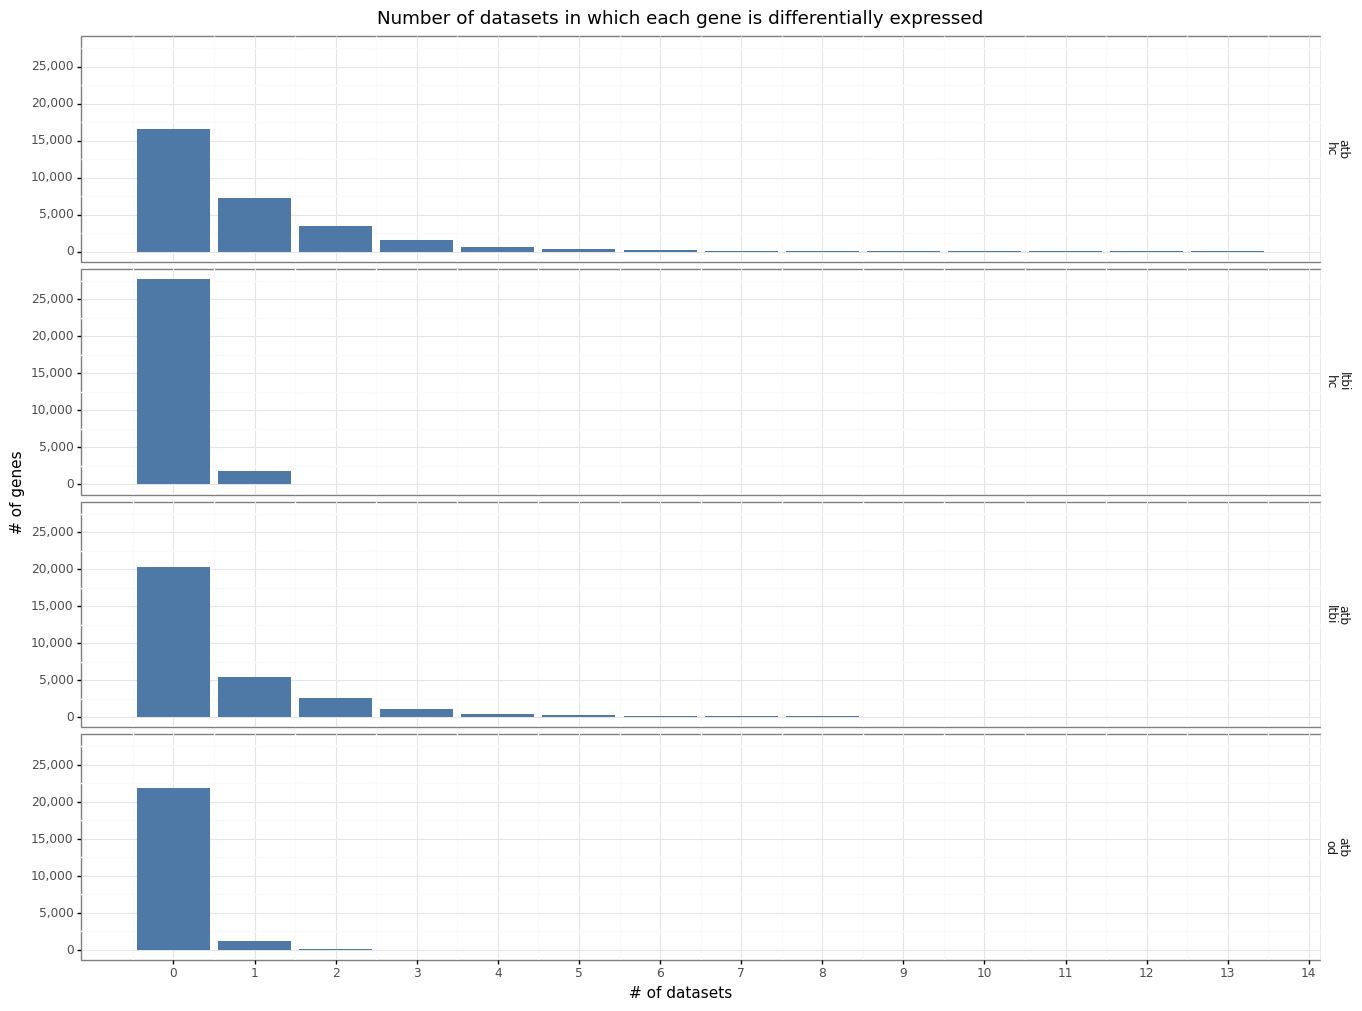

In [30]:
tbplt.plot_n_datasets_differentially_expressed(merged_results).draw();

In [31]:
networks = na.construct_networks(merged_results)

In [32]:
gene_lists = na.combine_networks_into_lists(networks, n_nodes=100)

In [33]:
gene_lists

{'top_genes_in_all_networks': [],
 'top_genes_not_in_od_network': ['STAT4',
  'FAM102A',
  'LAX1',
  'SYTL2',
  'TSEN54',
  'ST6GALNAC6',
  'FCRL2',
  'DHRS3',
  'SKAP1',
  'TCL1A',
  'TRABD2A',
  'CNNM3',
  'TBX21',
  'ATP8B2',
  'SLFN5',
  'SLC4A7',
  'EPHA4']}

In [ ]:
tbplt.plot_edge_weight_distribution(merged_results, control='hc', case='atb').draw();

In [41]:
df_ = merged_results.copy()
control = 'hc'
case = 'atb'

In [42]:
df_ = df_.loc[(df_.control == control) & (df_.case == case)]

In [43]:
edge_weights = na._compute_edge_weights(df_)

In [45]:
df_edge_weights = pd.DataFrame(edge_weights, columns=['edge_weights'])

In [ ]:
df_edge_weights

In [ ]:
df__ = (df__
    .groupby(['control', 'case'])
    .apply(compute_edge_weights)
    .explode()
    .reset_index()
    .rename({0: 'edge_weights'}, axis=1))

In [ ]:
df_.sample(frac=0.1).groupby(['control', 'case', 'edge_weights']).count()

In [ ]:
df_.head(100000).groupby(['control', 'case']).nunique()

In [ ]:
edge_weight_props = (df_
    .head(1000)
    .set_index(['control', 'case', 'edge_weights'])
    .insert(0, )
    .nunique()
    .reset_index()
    .rename({0: 'n_edges'}, axis=1))

In [ ]:
df_.head(1000).set_index(['control', 'case', 'edge_weights'])

In [ ]:
.groupby(['control', 'case', 'edge_weights'])df_

In [ ]:
df_ = df_.merge(
    edge_weight_props, how='left', on=['control', 'case', 'edge_weights'])

In [ ]:
n_edges = df_.groupby(['control', 'case']).count().reset_index().rename({'edge_weight': 'n_edges'}, axis=1)

In [ ]:
df_ = df_.merge(n_edges, how='left', on=['control', 'case'])

In [ ]:
df_['edge_weight2'] = df_['edge_weight']/df_['n_edges']

In [ ]:
(df_test.groupby('edge_weight')['edge_weight'].count()/n_edges).sum()

In [ ]:
(
    ggplot(df_, aes(x='edge_weight')) +
    geom_bar(
        fill=blue,
        color=blue,
        alpha=0.5) +
    facet_grid(
        'control + case ~ .') +
    scale_x_discrete(
        breaks=np.arange(-16, 17, 1)) +
    scale_y_continuous(
        labels=comma_format()) +
    labs(x='Edge weight',
         y='Number of edges',
         title='Distributions of edge weights') +
    theme_bw()
).draw();

In [ ]:
test = np.array([[5, 2, 3], [0, 2, 7], [0, 0, 4]])

In [ ]:
Counter(list(test[np.triu_indices(3)]))

In [ ]:
from collections import Counter

### Log FC heatmaps

In [34]:
gene_set = set(gene_lists['top_genes_in_all_networks'] + gene_lists['top_genes_not_in_od_network'])

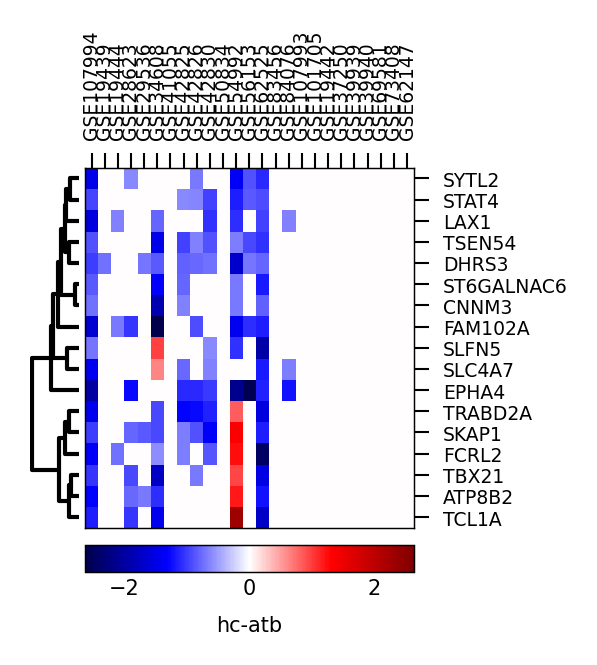

In [36]:
tbplt.plot_log_fc_heatmap(
    merged_results, gene_set, control='hc', case='atb')

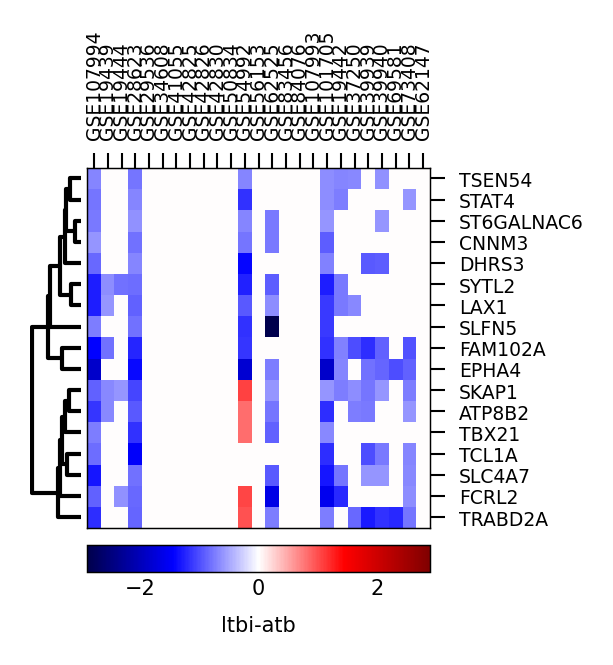

In [37]:
tbplt.plot_log_fc_heatmap(
    merged_results, gene_set, control='ltbi', case='atb')

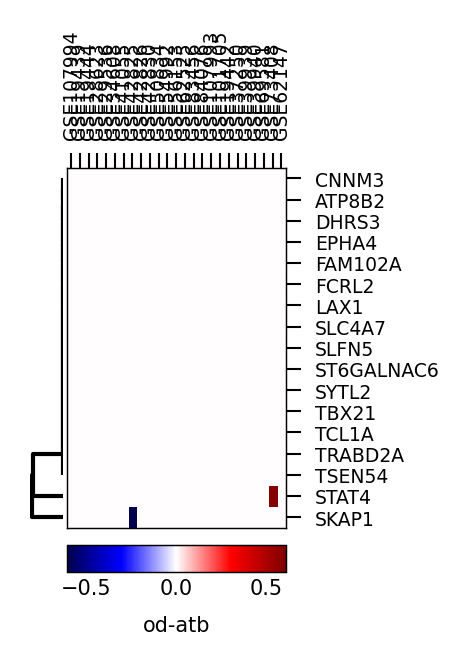

In [38]:
tbplt.plot_log_fc_heatmap(
    merged_results, gene_set, control='od', case='atb')